# Linear Regression

The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

####  formulae used for Linear Regression
y = mx + b

Where b is the intercept and m is the slope of the line

#### now here we are taking some random student scores depending upon the number of hours he studies

In [1]:
import pandas as pd 
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


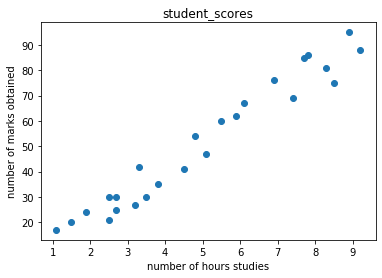

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("student_scores")
plt.xlabel("number of hours studies")
plt.ylabel("number of marks obtained")
plt.scatter(df.Hours,df.Scores)
plt.show()

In [4]:
## by looking at the data we are concluded that this will follow the linear regression model 
## look guys these all points are linearly increasing w.r.t  number of hours students studies for exam

### Preparing the Data

In [5]:
X = df.iloc[:, :1].values
y = df.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
### the value of the  b in our linear model

In [9]:
print(regressor.intercept_)

2.018160041434683


In [10]:
### the value of the  m in our linear model
print(regressor.coef_)

[9.91065648]


In [11]:
## now we are predicting the test values
y_pred = regressor.predict(X_test)

In [12]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
regressor.score(X_test,y_test)

0.9454906892105356

### Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

#### Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
Mean Absolute Error === 1/n(sum (actual - predicted ))


#### Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
Mean Squared Error === 1/n(sum (square(actual - predicted )))


#### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
Root Mean Squared Error === sqrt(1/n(sum (square(actual - predicted ))))


Luckily, we don't have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

In [14]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


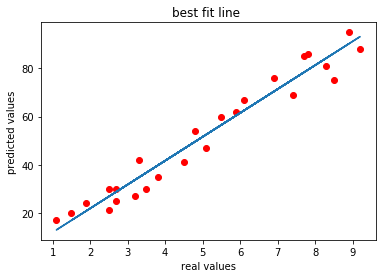

In [15]:
#### plotting the best fit line for our model

plt.title("best fit line ")
plt.xlabel("real values")
plt.ylabel("predicted values")
plt.scatter(X,y,c = 'r')
plt.plot(X,regressor.predict(X))

## Multiple Linear Regression

##### A regression model involving multiple variables can be represented as:
    y = b0 + m1b1 + m2b2 + m3b3 + ... ... mnbn
    
##### This is the equation of a hyper plane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyper plane

In [17]:
data=pd.read_csv("petrol_consumption.csv")
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [18]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [19]:
#### preparing the data to train and test

X=data.drop("Petrol_Consumption",axis=1)
y=data.Petrol_Consumption

In [21]:
#### Execute the following code to divide our data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Algorithm

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
## this the m value for our regresssor model

regressor.intercept_

425.5993322032417

In [25]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [26]:
## this the b value for our regresssor model

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


###  Making Predictions
To make pre-dictions on the test data, execute the following script:

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
y_pred

array([469.39198872, 545.64546431, 589.66839402, 569.7304133 ,
       649.77480909, 646.63116356, 511.60814841, 672.47517717,
       502.07478157, 501.2707342 ])

#### To compare the actual output values for X_test with the predicted values

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


In [34]:
### we are trying to plot best fit line but it is a hyper plane we cannot assume or not plot that type of planes 